<a href="https://colab.research.google.com/github/cgholt/ML_work/blob/main/orchid_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs available: ', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs available:  1


In [3]:
!pip install bing-image-downloader

In [10]:
from bing_image_downloader import downloader

In [ ]:
downloader.download("cattleya orchid", limit=200, output_dir='/content/images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)
#downloader.download("vanda orchid", limit=200,  output_dir='/content/images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)
#downloader.download("phalaenopsis orchid", limit=200,  output_dir='/content/images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)
#downloader.download("bulbophyllum orchid", limit=200,  output_dir='/content/images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)
#downloader.download("dendrobium orchid", limit=200,  output_dir='/content/images', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

In [ ]:
path = '/content/images/dendrobium orchid'
for i, filename in enumerate(os.listdir(path)):
  os.rename(path + '/' + filename, path + '/' + 'dendrobium' + str(i) + '.jpg')

In [26]:

orchids = ['cattleya', 'vanda', 'phalaenopsis', 'dendrobium', 'bulbophyllum']
for o in orchids:
  os.chdir('/content/images/' + o + ' orchid')
  for c in random.sample(glob.glob('I*'), 150):
    shutil.move(c, '/content/images/train/' + o)
  for c in random.sample(glob.glob('I*'), 30):
    shutil.move(c, '/content/images/validation/' + o)
  for c in random.sample(glob.glob('I*'), 20):
    shutil.move(c, '/content/images/test/' + o)

In [19]:
path = '/content/images/validation'
os.makedirs(path + '/' + 'cattleya')
os.makedirs(path + '/' + 'vanda')
os.makedirs(path + '/' + 'phalaenopsis')
os.makedirs(path + '/' + 'dendrobium')
os.makedirs(path + '/' + 'bulbophyllum')

In [ ]:
os.chdir('/content/images/validation')
path = '/content/images/validation'

for c in glob.glob('cat*'):
  if os.path.isfile(c):
    shutil.move(c, path + '/' + 'cattleya')
for c in glob.glob('den*'):
  if os.path.isfile(c):
    shutil.move(c, path + '/' + 'dendrobium')
for c in glob.glob('ph*'):
  if os.path.isfile(c):
    shutil.move(c, path + '/' + 'phalaenopsis')
for c in glob.glob('bu*'):
  if os.path.isfile(c):
    shutil.move(c, path + '/' + 'bulbophyllum')
for c in glob.glob('va*'):
  if os.path.isfile(c):
    shutil.move(c, path + '/' + 'vanda')

In [27]:
train_path = '/content/images/train'
val_path = '/content/images/validation'
test_path = '/content/images/test'

In [46]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cattleya', 'phalaenopsis', 'dendrobium', 'vanda', 'bulbophyllum'], batch_size=10)
val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path, target_size=(224,224), classes=['cattleya', 'phalaenopsis', 'dendrobium', 'vanda', 'bulbophyllum'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cattleya', 'phalaenopsis', 'dendrobium', 'vanda', 'bulbophyllum'], batch_size=10, shuffle=False)

Found 749 images belonging to 5 classes.
Found 150 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [47]:
imgs, labels = next(train_batches)

In [48]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

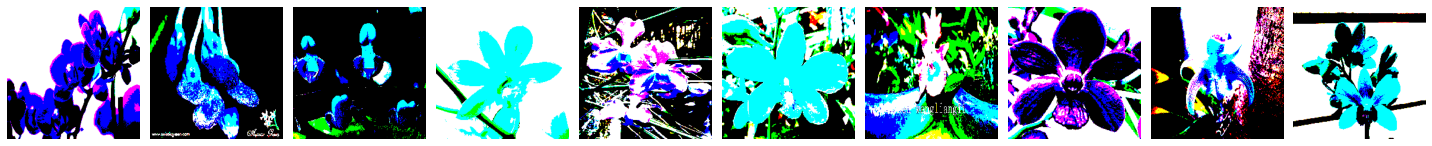

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


In [49]:
plotImages(imgs)
print(labels)

In [50]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Flatten(),
                    Dense(units=5, activation='softmax')
])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_1 (Dense)             (None, 5)                

In [52]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(x=train_batches, validation_data=val_batches, epochs=10, verbose=2)

Epoch 1/10
75/75 - 24s - loss: 36.0809 - accuracy: 0.3685 - val_loss: 10.5046 - val_accuracy: 0.5600 - 24s/epoch - 315ms/step
Epoch 2/10
75/75 - 23s - loss: 4.0404 - accuracy: 0.7437 - val_loss: 5.8468 - val_accuracy: 0.6533 - 23s/epoch - 305ms/step
Epoch 3/10
75/75 - 23s - loss: 1.3948 - accuracy: 0.8959 - val_loss: 9.9060 - val_accuracy: 0.5867 - 23s/epoch - 307ms/step
Epoch 4/10
75/75 - 23s - loss: 1.1877 - accuracy: 0.8959 - val_loss: 4.8787 - val_accuracy: 0.7133 - 23s/epoch - 309ms/step
Epoch 5/10
75/75 - 23s - loss: 0.7672 - accuracy: 0.9519 - val_loss: 5.0930 - val_accuracy: 0.6733 - 23s/epoch - 309ms/step
Epoch 6/10
75/75 - 23s - loss: 0.7544 - accuracy: 0.9599 - val_loss: 4.6721 - val_accuracy: 0.7133 - 23s/epoch - 308ms/step
Epoch 7/10
75/75 - 23s - loss: 0.5230 - accuracy: 0.9733 - val_loss: 5.0486 - val_accuracy: 0.6467 - 23s/epoch - 307ms/step
Epoch 8/10
75/75 - 23s - loss: 0.5973 - accuracy: 0.9533 - val_loss: 4.3881 - val_accuracy: 0.7133 - 23s/epoch - 303ms/step
Epoch 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

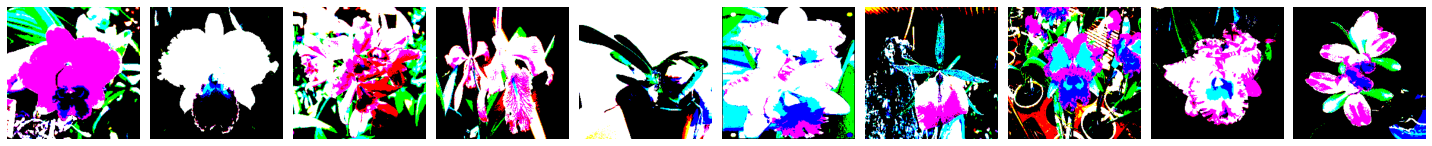

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [54]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [55]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [56]:
predictions = model.predict(x=test_batches, verbose=0)

In [57]:
np.round(predictions)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0.

In [58]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [59]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  thresh = cm.max() / 2. 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', 
             color='white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('true label')
  plt.xlabel('predicted label')

In [60]:
test_batches.class_indices

{'bulbophyllum': 4,
 'cattleya': 0,
 'dendrobium': 2,
 'phalaenopsis': 1,
 'vanda': 3}

Confusion matrix without normalization
[[11  5  1  2  1]
 [ 1 15  2  2  0]
 [ 2  9  8  0  1]
 [ 0 11  0  8  1]
 [ 2  3  0  1 14]]


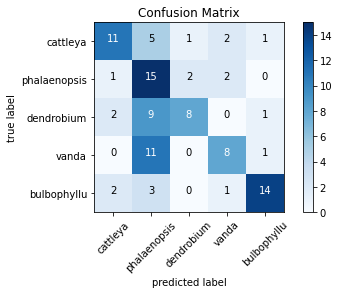

In [62]:
cm_plot_labels = ['cattleya', 'phalaenopsis', 'dendrobium', 'vanda', 'bulbophyllu']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [65]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 4s 0us/step


In [66]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [67]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [69]:
for layer in model.layers:
  layer.trainable = False

In [70]:
model.add(Dense(units=5, activation='softmax'))

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [72]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
model.fit(x=train_batches, validation_data=val_batches, epochs=20, verbose=2)

Epoch 1/20
75/75 - 25s - loss: 0.6705 - accuracy: 0.7557 - val_loss: 0.9979 - val_accuracy: 0.6400 - 25s/epoch - 335ms/step
Epoch 2/20
75/75 - 24s - loss: 0.5997 - accuracy: 0.7957 - val_loss: 0.9615 - val_accuracy: 0.6533 - 24s/epoch - 324ms/step
Epoch 3/20
75/75 - 24s - loss: 0.5426 - accuracy: 0.8264 - val_loss: 0.9446 - val_accuracy: 0.6800 - 24s/epoch - 321ms/step
Epoch 4/20
75/75 - 24s - loss: 0.4918 - accuracy: 0.8505 - val_loss: 0.9330 - val_accuracy: 0.6733 - 24s/epoch - 317ms/step
Epoch 5/20
75/75 - 24s - loss: 0.4525 - accuracy: 0.8571 - val_loss: 0.9079 - val_accuracy: 0.6867 - 24s/epoch - 319ms/step
Epoch 6/20
75/75 - 24s - loss: 0.4209 - accuracy: 0.8838 - val_loss: 0.9007 - val_accuracy: 0.7067 - 24s/epoch - 317ms/step
Epoch 7/20
75/75 - 24s - loss: 0.3866 - accuracy: 0.8959 - val_loss: 0.8785 - val_accuracy: 0.7267 - 24s/epoch - 316ms/step
Epoch 8/20
75/75 - 24s - loss: 0.3608 - accuracy: 0.9079 - val_loss: 0.8900 - val_accuracy: 0.7133 - 24s/epoch - 319ms/step
Epoch 9/

In [74]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [75]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [76]:
x = mobile.layers[-6].output
output = Dense(units=5, activation='softmax')(x)

In [ ]:
model = Model(inputs=)